# Stylistic Figures Classification Project

## 1. Objective

This project aims to classify French stylistic figures (figures de style) from short text examples using a fine-tuned CamemBERT model. Each text example contains a rhetorical device, and the goal is to detect which one it is.


In [1]:
import os

# Path to your corpus folder
corpus_folder = "corpus"

# Loop through all .txt files in the folder
for filename in os.listdir(corpus_folder):
    if filename.endswith(".txt"):
        filepath = os.path.join(corpus_folder, filename)

        # Read all lines from the file
        with open(filepath, "r", encoding="utf-8") as file:
            lines = file.readlines()

        # Remove duplicates and empty lines while keeping order
        unique_lines = list(dict.fromkeys(line.strip() for line in lines if line.strip()))

        # Write cleaned lines back to the file
        with open(filepath, "w", encoding="utf-8") as file:
            for line in unique_lines:
                file.write(line + "\n")

        print(f"{filename}: {len(lines)} → {len(unique_lines)} lines after cleaning.")


accumulation.txt: 70 → 70 lines after cleaning.
allegorie.txt: 42 → 42 lines after cleaning.
alliteration.txt: 71 → 71 lines after cleaning.
anacoluthe.txt: 68 → 68 lines after cleaning.
anaphore.txt: 68 → 68 lines after cleaning.
antiphrase.txt: 74 → 74 lines after cleaning.
antithese.txt: 58 → 58 lines after cleaning.
assonance.txt: 54 → 54 lines after cleaning.
chiasme.txt: 56 → 56 lines after cleaning.
comparaison.txt: 52 → 52 lines after cleaning.
ellipse.txt: 68 → 68 lines after cleaning.
euphemisme.txt: 47 → 47 lines after cleaning.
gradation.txt: 59 → 59 lines after cleaning.
hyperbole.txt: 49 → 49 lines after cleaning.
litote.txt: 47 → 47 lines after cleaning.
metaphore.txt: 69 → 69 lines after cleaning.
metonymie.txt: 44 → 44 lines after cleaning.
oxymore.txt: 45 → 45 lines after cleaning.
paradoxe.txt: 48 → 48 lines after cleaning.
parallelisme.txt: 62 → 62 lines after cleaning.
paronomase.txt: 54 → 54 lines after cleaning.
periphrase.txt: 65 → 65 lines after cleaning.
perso

In [2]:
import os

corpus_dir = "corpus"
data = []

for filename in os.listdir(corpus_dir):
    if filename.endswith(".txt"):
        figure = filename.replace(".txt", "")
        with open(os.path.join(corpus_dir, filename), encoding="utf-8") as f:
            for line in f:
                line = line.strip()
                if line:
                    data.append((line, figure))

print(f"{len(data)} exemples collectés.")

1463 exemples collectés.


## 2. Dataset

The dataset consists of hand-labeled examples stored in `.txt` files, one per stylistic figure. After preprocessing, we obtained the following number of examples per figure:

| Figure               | Examples |
|----------------------|----------|
| accumulation         | 70       |
| allegorie            | 42       |
| alliteration         | 71       |
| anacoluthe           | 68       |
| anaphore             | 68       |
| antiphrase           | 74       |
| antithese            | 58       |
| assonance            | 54       |
| chiasme              | 56       |
| comparaison          | 52       |
| ellipse              | 68       |
| euphemisme           | 47       |
| gradation            | 59       |
| hyperbole            | 49       |
| litote               | 47       |
| metaphore            | 69       |
| metonymie            | 44       |
| oxymore              | 45       |
| paradoxe             | 48       |
| parallelisme         | 62       |
| paronomase           | 54       |
| periphrase           | 65       |
| personnification     | 54       |
| question_rhetorique  | 54       |
| synecdoque           | 36       |
| zeugma               | 49       |

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.DataFrame(data, columns=["texte", "figure"])
X_train, X_test, y_train, y_test = train_test_split(df["texte"], df["figure"], test_size=0.2, random_state=42)


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2))),
    ("clf", RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


                     precision    recall  f1-score   support

       accumulation       0.43      0.20      0.27        15
          allegorie       1.00      0.25      0.40         8
       alliteration       0.00      0.00      0.00         7
         anacoluthe       0.64      0.44      0.52        16
           anaphore       0.50      0.08      0.13        13
         antiphrase       0.33      0.50      0.40        14
          antithese       0.50      0.12      0.20        16
          assonance       0.50      0.18      0.27        11
            chiasme       0.20      0.09      0.12        11
        comparaison       0.58      0.92      0.71        12
            ellipse       0.30      0.40      0.34        15
         euphemisme       0.07      0.14      0.10         7
          gradation       0.20      0.12      0.15         8
          hyperbole       0.33      0.22      0.27         9
             litote       0.47      0.80      0.59        10
          metaphore    

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

=== Classification Report ===

                     precision    recall  f1-score   support

       accumulation       0.43      0.20      0.27        15
          allegorie       1.00      0.25      0.40         8
       alliteration       0.03      0.14      0.06         7
         anacoluthe       0.47      0.56      0.51        16
           anaphore       0.33      0.15      0.21        13
         antiphrase       0.36      0.29      0.32        14
          antithese       1.00      0.12      0.22        16
          assonance       0.33      0.27      0.30        11
            chiasme       0.00      0.00      0.00        11
        comparaison       0.62      0.83      0.71        12
            ellipse       0.25      0.40      0.31        15
         euphemisme       0.19      0.43      0.26         7
          gradation       0.17      0.12      0.14         8
          hyperbole       0.00      0.00      0.00         9
             litote       0.53      0.80      0.64   

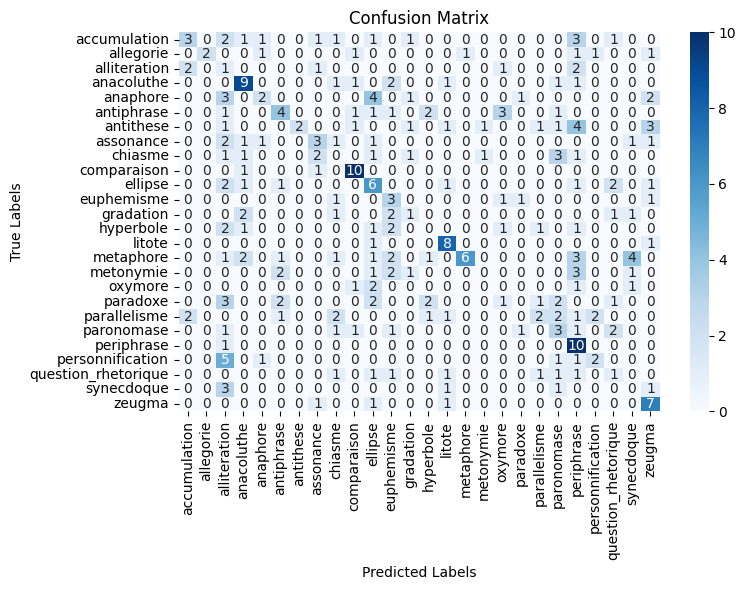

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define a text classification pipeline with TF-IDF vectorization and Random Forest classifier
text_clf = Pipeline([
    ("tfidf", TfidfVectorizer(
        ngram_range=(1, 2),        # Use unigrams and bigrams
        stop_words='english',       # Remove French stop words
        max_df=0.9,                # Ignore terms that appear in more than 90% of documents
        min_df=2                   # Ignore terms that appear in fewer than 2 documents
    )),
    ("clf", RandomForestClassifier(
        n_estimators=100,          # Number of trees in the forest
        max_depth=None,            # No maximum depth (nodes are expanded until all leaves are pure)
        random_state=42,           # Ensure reproducibility
        n_jobs=-1                  # Use all available cores
    ))
])

# Train the model
text_clf.fit(X_train, y_train)

# Make predictions
y_pred = text_clf.predict(X_test)

# Print classification report
print("=== Classification Report ===\n")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


## Using CamemBERT for Stylistic Figure Classification

While traditional models based on TF-IDF and classical machine learning provide a baseline, they often fail to capture the deep semantic and syntactic patterns typical of rhetorical devices.

To improve accuracy and generalization, especially given our relatively small dataset, we turn to CamemBERT — a state-of-the-art transformer-based language model trained specifically on French. CamemBERT allows us to better understand the structure and meaning of French literary texts thanks to its contextual embeddings.

Below, we begin by loading our custom dataset, which consists of short literary excerpts labeled with the stylistic figure they illustrate. This dataset will be used to fine-tune CamemBERT for multi-class text classification.

In [8]:
!pip install transformers datasets scikit-learn --quiet

import os
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import CamembertTokenizer, CamembertForSequenceClassification
from torch.optim import AdamW
from transformers import get_scheduler
from tqdm.auto import tqdm


In [9]:
# === 1. Charger les données ===

DATA_DIR = Path("corpus")
texts = []
labels = []
label2id = {}

for idx, file in enumerate(sorted(DATA_DIR.glob("*.txt"))):
    label = file.stem
    label2id[label] = idx
    with open(file, encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line:
                texts.append(line)
                labels.append(idx)

id2label = {v: k for k, v in label2id.items()}

In [10]:
# === 2. Split Train/Test ===

train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

In [11]:
# === 3. Tokenization ===

tokenizer = CamembertTokenizer.from_pretrained("camembert-base")

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

In [46]:
# === 4. Dataset PyTorch ===

class StyleDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = StyleDataset(train_encodings, train_labels)
test_dataset = StyleDataset(test_encodings, test_labels)

In [13]:
# === 5. Fine-tuning Camembert ===

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CamembertForSequenceClassification.from_pretrained(
    "camembert-base", num_labels=len(label2id), id2label=id2label, label2id=label2id
).to(device)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

optimizer = AdamW(model.parameters(), lr=5e-5)
lr_scheduler = get_scheduler(
    "linear", optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=len(train_loader) * 3  # 3 epochs
)

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
# === 6. Entraînement ===

model.train()
for epoch in range(1):
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}")
    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        loop.set_postfix(loss=loss.item())

Epoch 1: 100%|██████████| 147/147 [17:37<00:00,  7.20s/it, loss=3.25]


In [15]:
# === 7. Évaluation ===

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=-1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch["labels"].cpu().numpy())

print("=== Rapport de classification ===")
print(classification_report(all_labels, all_preds, target_names=[id2label[i] for i in range(len(id2label))]))

=== Rapport de classification ===
                     precision    recall  f1-score   support

       accumulation       0.39      1.00      0.56        14
          allegorie       0.00      0.00      0.00         8
       alliteration       0.17      0.71      0.28        14
         anacoluthe       0.33      0.14      0.20        14
           anaphore       0.57      0.29      0.38        14
         antiphrase       0.37      0.87      0.52        15
          antithese       0.00      0.00      0.00        12
          assonance       0.00      0.00      0.00        11
            chiasme       0.23      0.91      0.36        11
        comparaison       1.00      0.50      0.67        10
            ellipse       1.00      0.14      0.25        14
         euphemisme       0.00      0.00      0.00         9
          gradation       0.27      0.50      0.35        12
          hyperbole       0.00      0.00      0.00        10
             litote       0.00      0.00      0.00

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Initial Model Performance

We trained a CamemBERT-based classifier on this dataset. Due to the limited number of samples and the large number of classes (26), the model struggled to perform well.

### Evaluation on Test Set (Sample) : 
- Accuracy: 33%
- Weighted F1-score: 0.24


**Problems observed:**
- Several classes had **precision and recall equal to 0**.
- The model predicted a few dominant classes (like *accumulation*, *antiphrase*, *periphrase*) frequently, ignoring others.
- The training process was slow (~17 minutes for 1 epoch on CPU).
- High class imbalance and semantic overlap between classes limited the model's ability to generalize.

---

## Proposed Strategy: Merging Figures into Semantic Groups

Given the issues above, we propose to **group stylistic figures by function or meaning** to reduce the number of classes and increase classification performance.

### Benefits of Merging:

- **Reduces class imbalance** and number of rare labels.
- **Enhances model learning** by grouping semantically related figures.
- **Improves generalization** with small datasets.
- **Keeps pedagogical coherence**, grouping figures with similar rhetorical roles.

---

## 5. Suggested Groupings

| Group Name          | Included Figures                                 | Description                                  |
|---------------------|--------------------------------------------------|----------------------------------------------|
| Repetition          | anaphore, parallélisme, accumulation, gradation  | Reinforcement through repetition or buildup  |
| Sound Figures       | alliteration, assonance, paronomase              | Based on phonetic similarities               |
| Opposition & Irony  | antithèse, oxymore, paradoxe, antiphrase         | Use of contradiction or contrast             |
| Semantic Substitution | metaphore, métonymie, synecdoque, périphrase, comparaison  | Say something indirectly or symbolically     |
| Intensity Variation | hyperbole, litote, euphemisme                    | Amplify or soften meaning                    |
| Syntax Deviation    | ellipse, zeugma, anacoluthe                     | Disrupt the logical or syntactic structure   |
| Personification     | personnification, allégorie                      | Assign human or symbolic traits              |



In [17]:
import os
from pathlib import Path
from collections import defaultdict

# Dossier source avec les fichiers originaux
source_dir = Path("corpus")
# Nouveau dossier pour le dataset regroupé
target_dir = Path("corpus_grouped")
target_dir.mkdir(exist_ok=True)

# Définition des groupes sémantiques
group_mapping = {
    "Repetition": ["anaphore", "parallelisme", "accumulation", "gradation"],
    "Sound_Figures": ["alliteration", "assonance", "paronomase"],
    "Opposition_Irony": ["antithese", "oxymore", "paradoxe", "antiphrase", "question_rhetorique"],
    "Semantic_Substitution": ["metaphore", "metonymie", "synecdoque", "periphrase", "comparaison"],
    "Intensity_Variation": ["hyperbole", "litote", "euphemisme"],
    "Syntax_Deviation": ["ellipse", "zeugma", "anacoluthe", "chiasme"],
    "Personification": ["personnification", "allegorie"]
}

# Inverse mapping : figure → group
figure_to_group = {}
for group, figures in group_mapping.items():
    for fig in figures:
        figure_to_group[fig] = group

# Regrouper les lignes par groupe
grouped_texts = defaultdict(list)

for txt_file in source_dir.glob("*.txt"):
    figure = txt_file.stem.lower()
    if figure in figure_to_group:
        group = figure_to_group[figure]
        with open(txt_file, encoding="utf-8") as f:
            lines = [line.strip() for line in f if line.strip()]
            grouped_texts[group].extend(lines)
    else:
        print(f"⚠️ Figure '{figure}' not mapped to any group, skipping.")

# Sauvegarde dans les nouveaux fichiers
for group, lines in grouped_texts.items():
    target_file = target_dir / f"{group}.txt"
    with open(target_file, "w", encoding="utf-8") as f:
        for line in lines:
            f.write(line + "\n")

print("✅ Grouped dataset created in 'corpus_grouped/'")


✅ Grouped dataset created in 'corpus_grouped/'


# Shuffle the Data?

Before saving the grouped examples into their respective files, we shuffle the lines randomly. This randomization helps prevent ordering bias from the original files and ensures that the model sees a more varied and representative distribution of examples during training. Shuffling promotes better generalization and avoids overfitting to clusters of similar data.


In [18]:
import random

# ... (code précédent inchangé)

# Sauvegarde dans les nouveaux fichiers (avec shuffle)
for group, lines in grouped_texts.items():
    random.shuffle(lines)  # Mélange aléatoire
    target_file = target_dir / f"{group}.txt"
    with open(target_file, "w", encoding="utf-8") as f:
        for line in lines:
            f.write(line + "\n")


# Grouped Dataset Analysis

This document shows a quick summary of the new grouped dataset.

It counts the number of examples per semantic group and visualizes their distribution to check dataset balance.

The dataset files are in the `corpus_grouped/` folder, one file per group.

Number of examples per semantic group:
- Intensity_Variation: 143
- Opposition_Irony: 279
- Personification: 96
- Repetition: 259
- Semantic_Substitution: 266
- Sound_Figures: 179
- Syntax_Deviation: 241


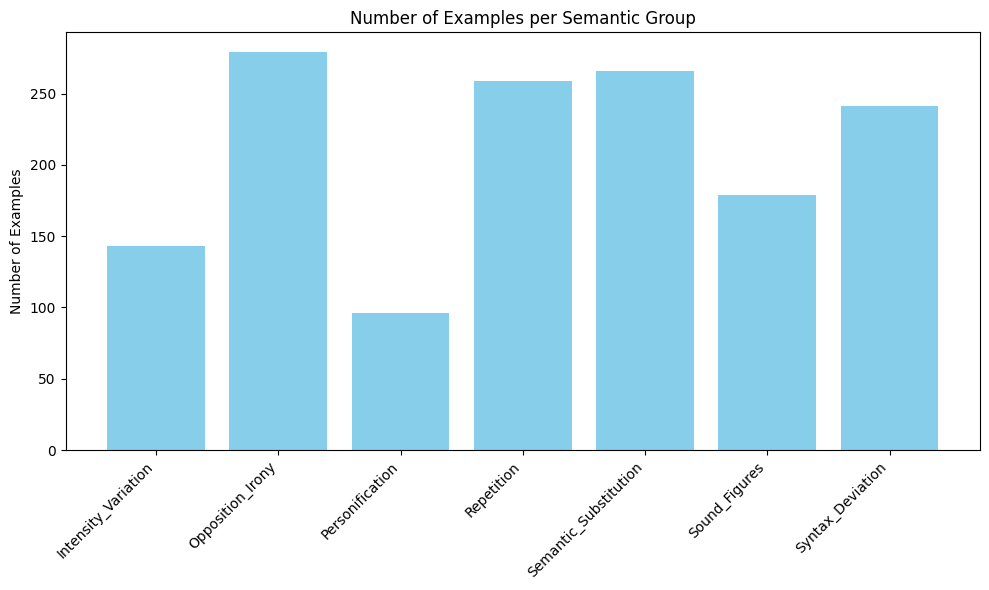

In [19]:
import os
from pathlib import Path
import matplotlib.pyplot as plt

dataset_dir = Path("corpus_grouped")

# Collect group names and example counts
group_counts = {}
for file in dataset_dir.glob("*.txt"):
    with open(file, encoding="utf-8") as f:
        lines = [line.strip() for line in f if line.strip()]
        group_counts[file.stem] = len(lines)

# Affichage console
print("Number of examples per semantic group:")
for group, count in group_counts.items():
    print(f"- {group}: {count}")

# Visualisation
plt.figure(figsize=(10,6))
plt.bar(group_counts.keys(), group_counts.values(), color='skyblue')
plt.title("Number of Examples per Semantic Group")
plt.ylabel("Number of Examples")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Style Figure Classification with CamemBERT

The next steps are :

1. **Loading labeled examples** from the new `.txt` files.
2. **Tokenizing the text** using `CamembertTokenizer`.
3. **Encoding and organizing** the data into PyTorch datasets.
4. **Fine-tuning CamemBERT** with a classification head using a training set.
5. **Evaluating the model** on a held-out test set using standard classification metrics.

In [ ]:
# === New classification with semantic groups ===

# Reload grouped data
GROUPED_DATA_DIR = Path("corpus_grouped")
grouped_texts = []
grouped_labels = []
grouped_label2id = {}

for idx, file in enumerate(sorted(GROUPED_DATA_DIR.glob("*.txt"))):
    label = file.stem
    grouped_label2id[label] = idx
    with open(file, encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line:
                grouped_texts.append(line)
                grouped_labels.append(idx)

grouped_id2label = {v: k for k, v in grouped_label2id.items()}

# Split
grouped_train_texts, grouped_test_texts, grouped_train_labels, grouped_test_labels = train_test_split(
    grouped_texts, grouped_labels, test_size=0.2, random_state=42, stratify=grouped_labels
)

# Tokenize
grouped_train_encodings = tokenizer(grouped_train_texts, truncation=True, padding=True, max_length=128)
grouped_test_encodings = tokenizer(grouped_test_texts, truncation=True, padding=True, max_length=128)

# Dataset
grouped_train_dataset = StyleDataset(grouped_train_encodings, grouped_train_labels)
grouped_test_dataset = StyleDataset(grouped_test_encodings, grouped_test_labels)

# Model
grouped_model = CamembertForSequenceClassification.from_pretrained(
    "camembert-base", num_labels=len(grouped_label2id),
    id2label=grouped_id2label, label2id=grouped_label2id
).to(device)

grouped_train_loader = DataLoader(grouped_train_dataset, batch_size=8, shuffle=True)
grouped_test_loader = DataLoader(grouped_test_dataset, batch_size=8)

# Optimizer and scheduler
grouped_optimizer = AdamW(grouped_model.parameters(), lr=5e-5)
grouped_lr_scheduler = get_scheduler(
    "linear", optimizer=grouped_optimizer,
    num_warmup_steps=0,
    num_training_steps=len(grouped_train_loader) * 3
)

# Training
grouped_model.train()
for epoch in range(1):
    loop = tqdm(grouped_train_loader, desc=f"Grouped Epoch {epoch+1}")
    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = grouped_model(**batch)
        loss = outputs.loss
        loss.backward()
        grouped_optimizer.step()
        grouped_lr_scheduler.step()
        grouped_optimizer.zero_grad()
        loop.set_postfix(loss=loss.item())

# Evaluation
grouped_model.eval()
grouped_preds, grouped_true = [], []

with torch.no_grad():
    for batch in grouped_test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = grouped_model(**batch)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=-1)
        grouped_preds.extend(preds.cpu().numpy())
        grouped_true.extend(batch["labels"].cpu().numpy())

print("=== Classification report (semantic groups) ===")
print(classification_report(grouped_true, grouped_preds, target_names=[grouped_id2label[i] for i in range(len(grouped_id2label))]))


Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Grouped Epoch 1: 100%|██████████| 147/147 [17:56<00:00,  7.32s/it, loss=2.1] 


=== Classification report (semantic groups) ===
                       precision    recall  f1-score   support

  Intensity_Variation       0.00      0.00      0.00        29
     Opposition_Irony       0.47      0.68      0.55        56
      Personification       0.00      0.00      0.00        19
           Repetition       0.54      0.96      0.69        52
Semantic_Substitution       0.43      0.74      0.54        53
        Sound_Figures       0.00      0.00      0.00        36
     Syntax_Deviation       0.61      0.35      0.45        48

             accuracy                           0.49       293
            macro avg       0.29      0.39      0.32       293
         weighted avg       0.36      0.49      0.40       293



c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

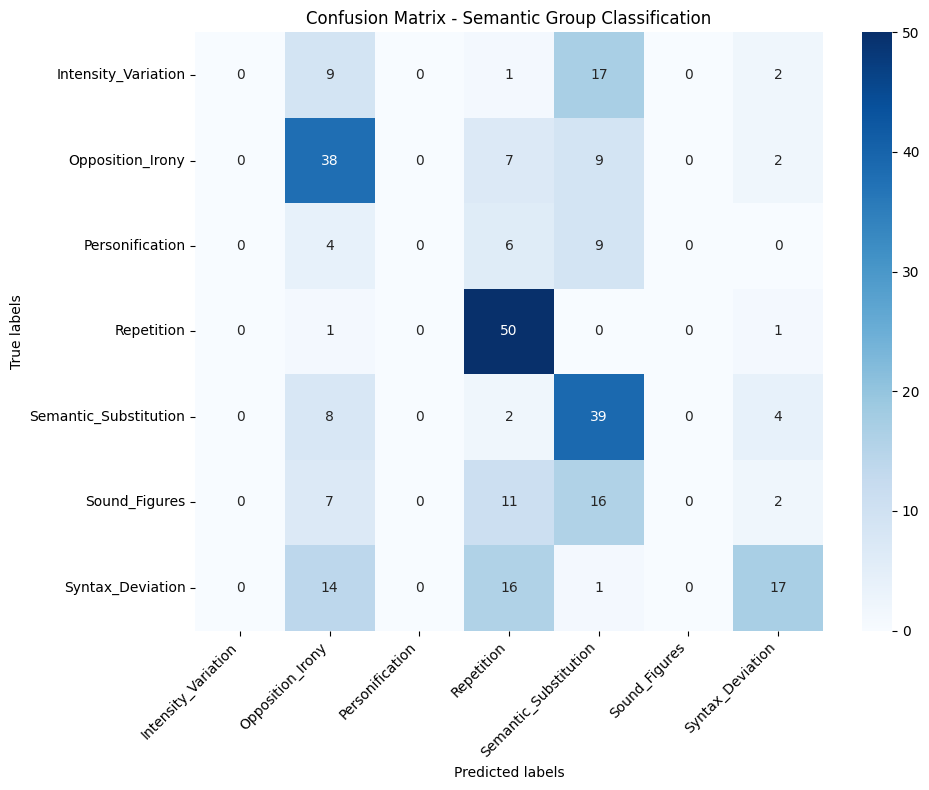

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(grouped_true, grouped_preds)

# Plot with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[grouped_id2label[i] for i in range(len(grouped_id2label))],
            yticklabels=[grouped_id2label[i] for i in range(len(grouped_id2label))])
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - Semantic Group Classification")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



# Comparative Results: Fine-Grained vs. Grouped Style Figure Classification

This project uses CamemBERT to classify French literary figures of speech. Two training strategies were evaluated:


| Approach               | Accuracy | Macro F1 | Comment                             |
|------------------------|----------|----------|-------------------------------------|
| Fine-grained           | 33%      | 23%      | Poor generalization, many 0 scores |
| Grouped (7 categories) | 49%      | 32%      | Better balance, more robust output |

---

## Conclusion

Grouping stylistic figures into higher-level semantic categories significantly improves classification performance, especially when dealing with sparse or imbalanced datasets. This strategy is recommended when fine-grained classification is not feasible due to data limitations.


# Challenges in Classifying Certain Literary Figures

Some figures of style like **Sound Figures**, **Personification**, and **Intensity Variation** show very low precision in text-only classification models such as CamemBERT. This happens because:

- **Sound Figures** depend largely on phonetic features (e.g., rhyme, alliteration) that are not directly captured by models trained only on text tokens.
- **Personification** involves attributing human traits to non-human entities, relying on figurative meaning and semantic nuances beyond literal text.
- **Intensity Variation** often reflects subtle shifts in emphasis or tone, which can be expressed through prosody or context, difficult to infer from isolated sentences.

### Key Points to Consider:
- Simply increasing data quantity may not fully solve these issues if the model architecture ignores sound or figurative meaning.
- Incorporating **phonetic or prosodic features**, or using **multi-modal approaches** (e.g., combining text with audio or phonetic embeddings), could improve detection.
- **Rule-based or hybrid systems** that integrate linguistic patterns alongside machine learning may better capture these stylistic nuances.
- Data augmentation focusing on these classes might help but should be combined with other strategies.

In summary, **addressing these figures requires going beyond pure text-based classification**, integrating sound and figurative understanding for better results.


# Simplification of Classes for Improved Results

In the rest of the project, we will remove the following challenging classes:  
- Sound_Figures  
- Personification  
- Intensity_Variation  

These classes are difficult to detect reliably using text-only data and negatively impact overall model performance. By excluding them, we aim to focus on the figures of style that the model can better learn, in order to achieve clearer and more meaningful results.

In [48]:
import os
from pathlib import Path
import shutil

# Dossier source et dossier destination
source_dir = Path("corpus_grouped")
target_dir = Path("corpus_filtered")
target_dir.mkdir(exist_ok=True)

# Classes à exclure
excluded_classes = {"Sound_Figures", "Personification", "Intensity_Variation"}

# Copier les fichiers sauf ceux exclus
for file in source_dir.glob("*.txt"):
    if file.stem not in excluded_classes:
        shutil.copy(file, target_dir / file.name)

print("Filtered corpus created in 'corpus_filtered/'")


Filtered corpus created in 'corpus_filtered/'
